# Data scraping trustpilot reviews

In this project I want to create a function that can scrape trustpilot reviews using BeautifulSoup. I've noticed a few projects online attempt to do this however none seemed to work because the tags they're using are outdated/trustpilot have updated their website since so I decided to create my own function that will work for any company. I've done this for my L&D but It'll be useful for areas of user research and turning qual into quant to help better understand customer frustrations and product improvements. 

**sources and inspo:** <br>
`1.` https://towardsdatascience.com/customer-reviews-identify-your-strengths-and-weaknesses-with-the-help-of-web-scraping-data-b87a3636ef55 <br>
`2.` https://www.datacamp.com/community/tutorials/wordcloud-python

In [11]:
import pandas as pd
from time import sleep
import requests
import tqdm
import time
import json
from bs4 import BeautifulSoup
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [31]:
def scrape_trustpilot(company_url,number_of_pages):
    """
    This function can be used to scrape customer reviews for a company on trustpilot
    
    Args:
        - company_url (str)  #e.g iwoca.co.uk. Please use the company url used within the trustpilot url here.
        - number_of_pages (int)
    
    Output:
        - Dataframe with columns: Date, Rating, Title text
    """
    
    #add number of pages in range()
    base_url="https://www.trustpilot.com/review/{company_url}?page=".format(company_url=company_url)
    trustpilot_urls = []
    n = 0
    for _ in range(number_of_pages):
        n+=1
        trustpilot_urls.append(base_url+str(n))

    #get all urls
    http_list = []
    soup_list = []
    for url in trustpilot_urls:
        http = requests.get(url)
        soup = BeautifulSoup(http.text,'html.parser')
        http_list.append(http)
        soup_list.append(soup)

    #get all ratings
    ratings = []
    ratings_text = []
    for html in soup_list:
        for div in soup.find_all('div','star-rating star-rating--medium'): #lists all image alt text
            for img in div.find_all('img', alt=True):
                ratings_text.append(img['alt'].split()[2])
                ratings.append(img['alt'].split()[0])


    #get all texts
    texts = []
    for html in soup_list:
        for p in soup.find_all('p','review-content__text'):
            if soup.find_all('p','review-content__text') is None:
                texts.append('')
            else:
                texts.append(p.contents[0])


    #get date published
    dates = []
    for html in soup_list:
        for div in soup.find_all('div','review-content-header__dates'):
            for script in div.find_all('script'):
                res = json.loads(script.get_text())
                dates.append(res.get('publishedDate'))

    #get titles
    titles = []
    for html in soup_list:
        for a in soup.find_all('a','link link--large link--dark'):
            titles.append(a.contents[0])


    tp_d = {'Dates':dates,'Ratings':ratings,'Ratings_description':ratings_text,'Text':titles}
    trustpilot_df = pd.DataFrame(tp_d)
    return trustpilot_df


In [40]:
#e.g
scrape_trustpilot(company_url='nike.com',number_of_pages=2)

,Dates,Ratings,Ratings_description,Text
0,2020-04-14T12:08:51Z,1,Bad,SHOCKING
1,2020-04-13T19:15:26Z,1,Bad,How many times do we have to put up with this...?
2,2020-04-13T17:26:13Z,5,Excellent,I don't understand how people despise…
3,2020-04-12T22:20:15Z,5,Excellent,Got a steal on some reacts can't…
4,2020-04-12T02:05:20Z,1,Bad,Overpriced brand I prefer addidas
5,2020-04-12T01:45:14Z,2,Poor,lack of designing caught my mindset to create ...
6,2020-04-11T07:01:07Z,1,Bad,only sent part of my order
7,2020-04-10T17:16:22Z,1,Bad,Wish I could make this a zero star review
8,2020-04-09T15:08:07Z,1,Bad,I just had the worst customer…
9,2020-04-09T00:34:00Z,1,Bad,I had to tap one star or I wouldn't…


In [ ]:
#additional: Create a wordcloud of most used words for good ratings.

In [5]:
trustpilot_df['Ratings'] = trustpilot_df['Ratings'].astype(int)

In [6]:
good_df = trustpilot_df[trustpilot_df['Ratings'] >= 3]

In [7]:
text = " ".join(review for review in good_df.Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4969 words in the combination of all review.


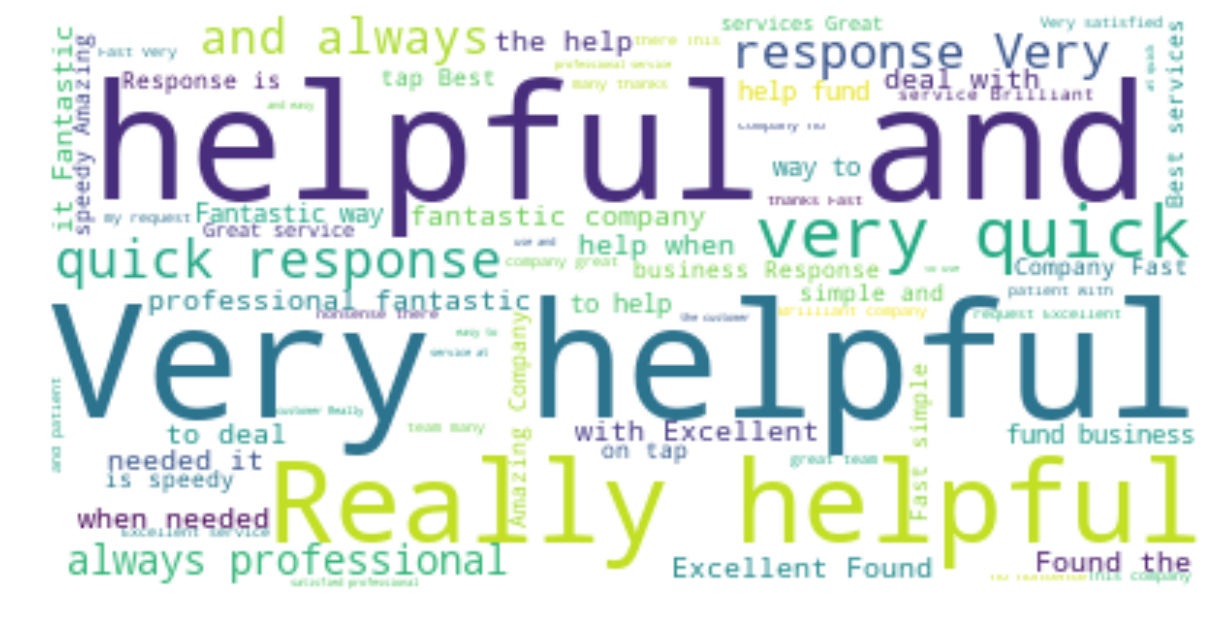

In [9]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white",max_words=5249).generate(text)
plt.figure(figsize=(15,10), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def get_title():
    titles = []
    for a in soup.find_all('a','link link--large link--dark'):
        titles.append(a.contents[0])
    return titles

In [192]:
def get_date():
    for div in soup.find_all('div','review-content-header__dates'):
        for script in div.find_all('script'):
            res = json.loads(script.get_text())
            print(res.get('publishedDate'))

In [ ]:
def get_text():
    for p in soup.find_all('p','review-content__text'):
        print(p.contents[0])

In [232]:
def get_rating():
    ratings = []
    ratings_text = []
    for div in soup.find_all('div','star-rating star-rating--medium'): #lists all image alt text
        for img in div.find_all('img', alt=True):
            ratings_text.append(img['alt'].split()[2])
            ratings.append(img['alt'].split()[0])
    print(ratings_text,ratings)
            
            

In [50]:
def no_of_pages(pages):
    base_url="https://www.trustpilot.com/review/iwoca.co.uk?page="
    trustpilot_urls = []
    n = 0
    for _ in range(pages):
        n+=1
        trustpilot_urls.append(base_url+str(n))
    return trustpilot_urls